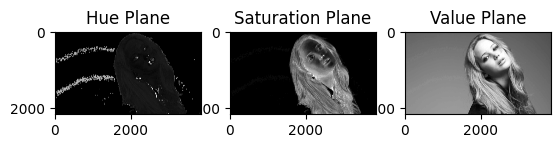

In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

img=cv.imread('jeniffer.jpg',cv.IMREAD_COLOR)
img1=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_hsv=cv.cvtColor(img,cv.COLOR_BGR2HSV)  #conveert to HSV plane

H,S,V=cv.split(img_hsv)  #split the three planes

fig,ax=plt.subplots(1,3)
ax[0].imshow(H,cmap='gray')
ax[0].set_title('Hue Plane')
ax[1].imshow(S,cmap='gray')
ax[1].set_title('Saturation Plane')
ax[2].imshow(V,cmap='gray')
ax[2].set_title('Value Plane')
plt.savefig('3 Planes')
plt.show()


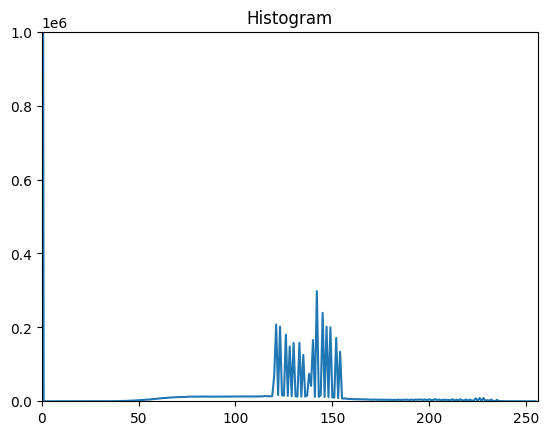

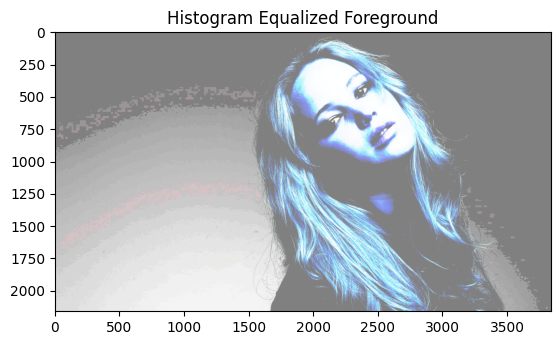

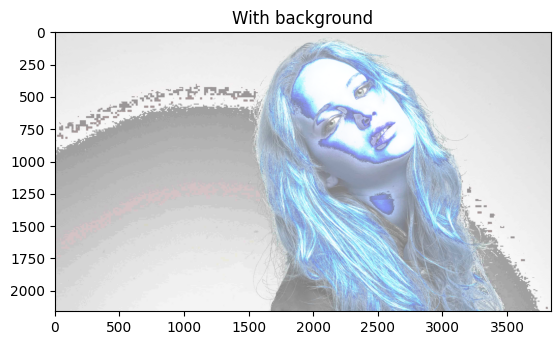

In [17]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

img=cv.imread('jeniffer.jpg',cv.IMREAD_COLOR)
img1=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_hsv=cv.cvtColor(img,cv.COLOR_BGR2HSV)  #conveert to HSV plane

H,S,V=cv.split(img_hsv)  #split the three planes

value=119   #Pixel values below threshold value would be changed to Black and above would be white
ret ,foreground_mask=cv.threshold(V,value,255,cv.THRESH_BINARY)

foreground_bit=cv.bitwise_and(img,img,mask=foreground_mask)  #using cv.bitwise_and
hist=cv.calcHist([foreground_bit],[0],None,[256],[0,256])
plt.plot(hist)
plt.title('Histogram')
plt.xlim(0,256)
plt.ylim(0,1*10**6)
plt.show()

cum_hist=np.cumsum(hist)  #cumulative sum of histogram
equ_value=np.round((cum_hist/cum_hist[-1])*255).astype('uint8')  #equalized values
equ_foreground=cv.LUT(foreground_bit,equ_value)
plt.imshow(equ_foreground,cmap='gray')
plt.title('Histogram Equalized Foreground')
plt.savefig('Histo_Fore')
plt.show()

background_mask=cv.bitwise_not(foreground_mask)  #Getting  the background mask
background_bit=cv.bitwise_and(img,img,mask=background_mask)  #getting the background
hist_equ_fore_back=cv.add(background_bit,equ_foreground)
plt.imshow(hist_equ_fore_back)
plt.title('With background')
plt.savefig('With_back')
plt.show()

